In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dataset_path = 'creditcard.csv'
df = pd.read_csv(dataset_path)

df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
dataset_arr = df.to_numpy()
X, y = dataset_arr[:, :-1].astype(np.float64), dataset_arr[:, -1].astype(np.uint8)

In [4]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

In [5]:
n_classes = np.unique(y, axis=0).shape[0]
print(f'Number of classes: {n_classes}')
n_samples = y.shape[0]
print(f'Number of samples: {n_samples}')

y_encoded = np.array(
    [np.zeros(n_classes) for _ in range(n_samples)]
)
print(y_encoded)

y_encoded[np.arange(n_samples), y] = 1

y_encoded

Number of classes: 2
Number of samples: 284807
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [6]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X_b, y_encoded, test_size=val_size, random_state=random_state, shuffle=is_shuffle)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state, shuffle=is_shuffle)

In [7]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [8]:
def softmax(z):
    exp_z = np.exp(z)

    return exp_z / exp_z.sum(axis=1)[:, None]

In [9]:
def predict(X, theta):
    z = np.dot(X, theta)
    y_hat = softmax(z)

    return y_hat

In [10]:
def compute_loss(y_hat, y):
    n = y.size

    return (-1 / n) * np.sum(y * np.log(y_hat))

In [11]:
def compute_gradient(X, y, y_hat):
    n = y.size

    return np.dot(X.T, (y_hat-y)) / n

In [12]:
def update_theta(theta, gradient, lr):
    return theta - lr*gradient

In [13]:
def compute_accuracy(X, y, theta):
    y_predict = predict(X, theta)
    acc = (np.argmax(y_predict, axis=1) == np.argmax(y, axis=1)).mean()

    return acc

In [14]:
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(size=(n_features, n_classes))

In [15]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i: i+batch_size]
        y_i = y_train[i: i+batch_size]

        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)
        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_i, y_i, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_losses = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_losses = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_accs = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_accs = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_losses)
    val_losses.append(val_batch_losses)
    train_accs.append(train_batch_accs)
    val_accs.append(val_batch_accs)

    print (f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_losses :.3f}\tValidation loss: {val_batch_losses :.3f}')


EPOCH 1:	Training loss: 0.300	Validation loss: 0.297

EPOCH 2:	Training loss: 0.176	Validation loss: 0.174

EPOCH 3:	Training loss: 0.115	Validation loss: 0.113

EPOCH 4:	Training loss: 0.081	Validation loss: 0.080

EPOCH 5:	Training loss: 0.062	Validation loss: 0.061

EPOCH 6:	Training loss: 0.049	Validation loss: 0.049

EPOCH 7:	Training loss: 0.041	Validation loss: 0.041

EPOCH 8:	Training loss: 0.035	Validation loss: 0.035

EPOCH 9:	Training loss: 0.031	Validation loss: 0.031

EPOCH 10:	Training loss: 0.028	Validation loss: 0.027

EPOCH 11:	Training loss: 0.025	Validation loss: 0.025

EPOCH 12:	Training loss: 0.023	Validation loss: 0.023

EPOCH 13:	Training loss: 0.021	Validation loss: 0.021

EPOCH 14:	Training loss: 0.020	Validation loss: 0.020

EPOCH 15:	Training loss: 0.019	Validation loss: 0.018

EPOCH 16:	Training loss: 0.017	Validation loss: 0.017

EPOCH 17:	Training loss: 0.017	Validation loss: 0.016

EPOCH 18:	Training loss: 0.016	Validation loss: 0.015

EPOCH 19:	Training

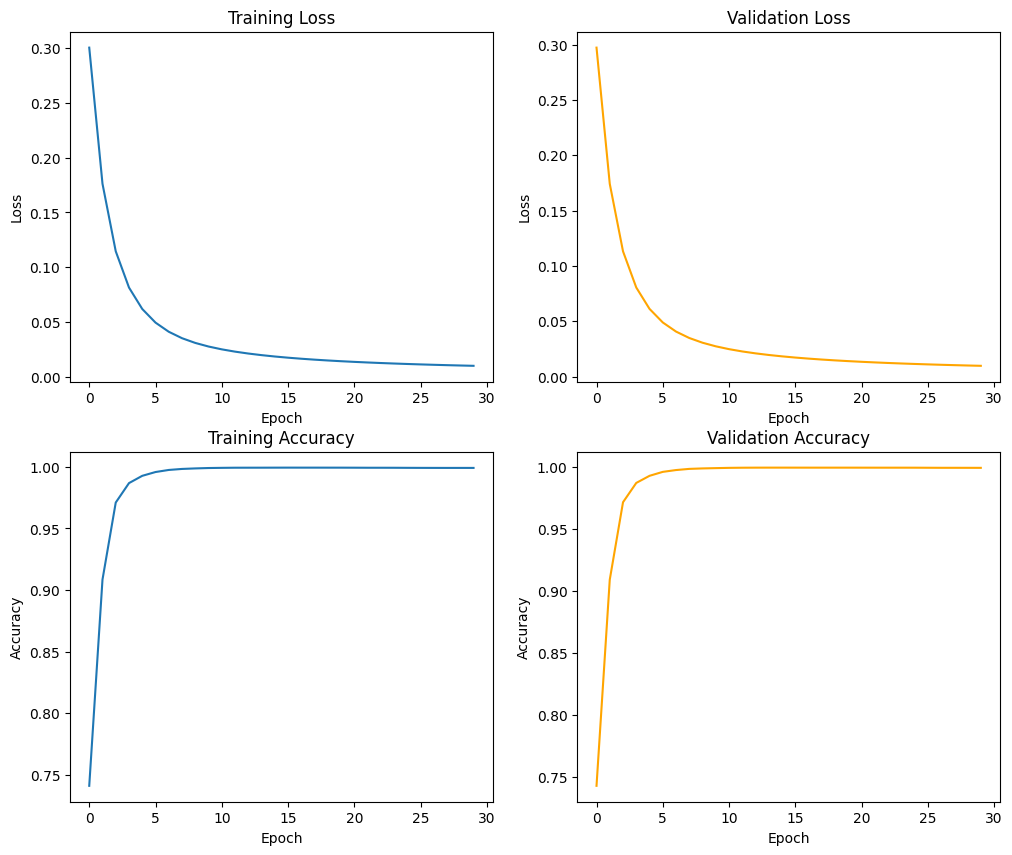

In [16]:
fig, ax = plt.subplots(2,2, figsize=(12,10))
ax[0,0].plot(train_losses)
ax[0,0].set(xlabel='Epoch', ylabel='Loss')
ax[0,0].set_title('Training Loss')

ax[0,1].plot(val_losses, color='orange')
ax[0,1].set(xlabel='Epoch', ylabel='Loss')
ax[0,1].set_title('Validation Loss')

ax[1,0].plot(train_accs)
ax[1,0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1,0].set_title('Training Accuracy')

ax[1,1].plot(val_accs, color='orange')
ax[1,1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1,1].set_title('Validation Accuracy')

plt.show()

In [17]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print ('Evaluation on validation and test set :')
print (f'Val Accuracy : {val_set_acc}')
print (f'Test Accuracy : {test_set_acc}')

Evaluation on validation and test set :
Val Accuracy : 0.9993153330290369
Test Accuracy : 0.9992275552122467


In [18]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
dataset_path = 'Twitter_Data.csv'
df = pd.read_csv(
    dataset_path
)

null_rows = df.isnull().any(axis=1)
df[null_rows]

,clean_text,category
148,NaN,0.0
130448,the foundation stone northeast gas grid inaugu...,NaN
155642,dear terrorists you can run but you cant hide ...,NaN
155698,offense the best defence with mission shakti m...,NaN
155770,have always heard politicians backing out thei...,NaN
158693,modi government plans felicitate the faceless ...,NaN
158694,NaN,-1.0
159442,chidambaram gives praises modinomics,NaN
159443,NaN,0.0
160559,the reason why modi contested from seats 2014 ...,NaN


In [20]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


In [21]:
def text_normalize(text):
    #Lowercasing
    text = text.lower()
    #Retweet old acronym "RT" removal
    text = re.sub(r'^rt[\s]+', '', text)

    #Hyperlinks removal
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)

    #Punctuation removal
    text = re.sub(r'[^\w\s]', '', text)

    #Remove stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)

    #Stemming
    stemmer = SnowballStemmer('english')
    words = text.split()
    words = [stemmer.stem(word) for word in words]
    text = ' '.join(words)

    return text

In [22]:
df['clean_text'] = df['clean_text'].apply(
    lambda x: text_normalize(x)
)

In [23]:
df

,clean_text,category
0,modi promis minimum govern maximum govern expe...,-1.0
1,talk nonsens continu drama vote modi,0.0
2,say vote modi welcom bjp told rahul main campa...,1.0
3,ask support prefix chowkidar name modi great s...,1.0
4,answer among power world leader today trump pu...,1.0
...,...,...
162975,456 crore paid neerav modi recov congress lead...,-1.0
162976,dear rss terrorist payal gawar modi kill 1000 ...,-1.0
162977,cover interact forum left,0.0
162978,big project came india modi dream project happ...,0.0


In [24]:
vectorizer = TfidfVectorizer(
    max_features=2000
)

X = vectorizer.fit_transform(
    df['clean_text']
).toarray()

X.shape

(162969, 2000)

In [25]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

X_b

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [26]:
n_classes = df['category'].nunique()
print(f'Number of classes: {n_classes}')
n_samples = df['category'].size
print(f'Number of samples: {n_samples}')

y = df['category'].to_numpy() + 1
y = y.astype(np.uint8)
y_encoded = np.array(
    [np.zeros(n_classes) for _ in range(n_samples)]
)

y_encoded

Number of classes: 3
Number of samples: 162969


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [27]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X_b, y_encoded, test_size=val_size, random_state=random_state, shuffle=is_shuffle)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state, shuffle=is_shuffle)

In [28]:
print(f'Number of training samples: {y_train.shape[0]}')
print(f'Number of val samples: {y_val.shape[0]}')
print(f'Number of test samples: {y_test.shape[0]}')

Number of training samples: 114078
Number of val samples: 32594
Number of test samples: 16297


In [29]:
lr = 0.1
epochs = 50
batch_size = X_train.shape[0]
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(size =(n_features, n_classes))

print(theta.shape)
print(X_train.shape)

(2001, 3)
(114078, 2001)


In [30]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i: i+batch_size]
        y_i = y_train[i: i+batch_size]

        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)
        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_i, y_i, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_losses = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_losses = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_accs = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_accs = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_losses)
    val_losses.append(val_batch_losses)
    train_accs.append(train_batch_accs)
    val_accs.append(val_batch_accs)

    print (f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_losses :.3f}\tValidation loss: {val_batch_losses :.3f}')


EPOCH 1:	Training loss: 0.000	Validation loss: 0.000

EPOCH 2:	Training loss: 0.000	Validation loss: 0.000

EPOCH 3:	Training loss: 0.000	Validation loss: 0.000

EPOCH 4:	Training loss: 0.000	Validation loss: 0.000

EPOCH 5:	Training loss: 0.000	Validation loss: 0.000

EPOCH 6:	Training loss: 0.000	Validation loss: 0.000

EPOCH 7:	Training loss: 0.000	Validation loss: 0.000

EPOCH 8:	Training loss: 0.000	Validation loss: 0.000

EPOCH 9:	Training loss: 0.000	Validation loss: 0.000

EPOCH 10:	Training loss: 0.000	Validation loss: 0.000

EPOCH 11:	Training loss: 0.000	Validation loss: 0.000

EPOCH 12:	Training loss: 0.000	Validation loss: 0.000

EPOCH 13:	Training loss: 0.000	Validation loss: 0.000

EPOCH 14:	Training loss: 0.000	Validation loss: 0.000

EPOCH 15:	Training loss: 0.000	Validation loss: 0.000

EPOCH 16:	Training loss: 0.000	Validation loss: 0.000

EPOCH 17:	Training loss: 0.000	Validation loss: 0.000

EPOCH 18:	Training loss: 0.000	Validation loss: 0.000

EPOCH 19:	Training

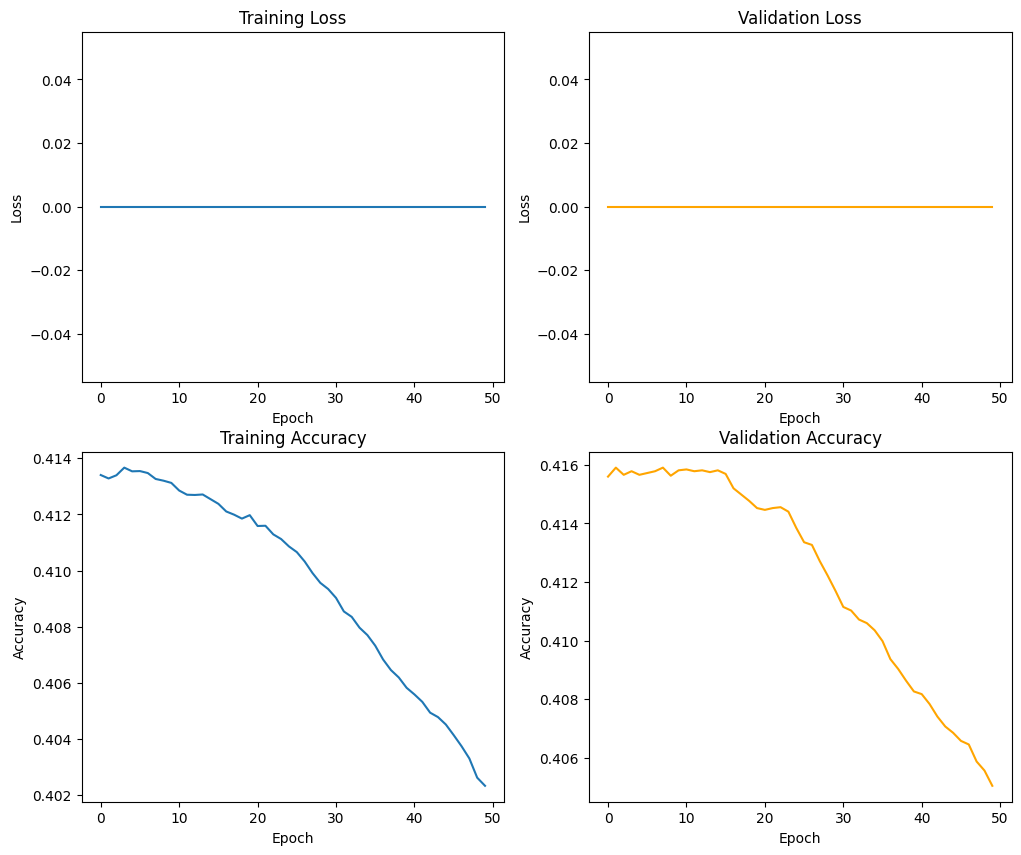

In [31]:
fig, ax = plt.subplots(2,2, figsize=(12,10))
ax[0,0].plot(train_losses)
ax[0,0].set(xlabel='Epoch', ylabel='Loss')
ax[0,0].set_title('Training Loss')

ax[0,1].plot(val_losses, color='orange')
ax[0,1].set(xlabel='Epoch', ylabel='Loss')
ax[0,1].set_title('Validation Loss')

ax[1,0].plot(train_accs)
ax[1,0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1,0].set_title('Training Accuracy')

ax[1,1].plot(val_accs, color='orange')
ax[1,1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1,1].set_title('Validation Accuracy')

plt.show()

In [32]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print ('Evaluation on validation and test set :')
print (f'Val Accuracy : {val_set_acc}')
print (f'Test Accuracy : {test_set_acc}')

Evaluation on validation and test set :
Val Accuracy : 0.4050438731054795
Test Accuracy : 0.40301896054488556
